## <center> The Sparks Foundation : GRIP-TSF January 2021
## <center>Task 2 : Prediction using Unsupervised ML
## <center> Author : Smit Borasaniya
## <center> Problem Statement : From given Iris dataset,predict the optimum number of clusters and represent it visually.

### Importing libraries :

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Importing the libraries
from sklearn import datasets

###  Getting Data :

In [11]:
# Load the iris dataset
iris_data=pd.read_csv("E:/smit/The Sparks foundation Internship/Task_2/task2_Iris.csv")
#taking a look to some rows:
iris_data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
13,14,4.3,3.0,1.1,0.1,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa
124,125,6.7,3.3,5.7,2.1,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
50,51,7.0,3.2,4.7,1.4,Iris-versicolor


### Exploring Of the Dataset :

In [5]:
#Dimension of iris_dataset:
iris_data.shape

(150, 6)

In [6]:
#information about iris_dataset:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#Description of Iris dataset:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


● There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).

### Data Cleaning:  

In [12]:
#Dropping the Id column:
iris_data.drop("Id",inplace=True,axis=1)
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

● There is no null values in the data set

### Data Visualization :

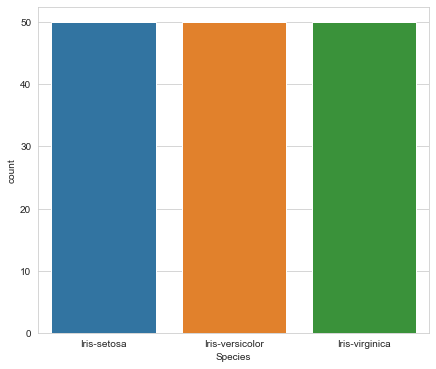

In [14]:
#Species Distribution :
sns.set_style("whitegrid")
plt.figure(figsize= (7,6))
sns.countplot(iris_data.Species)
plt.show()

● The data set contains 3 classes of 50 instances each.

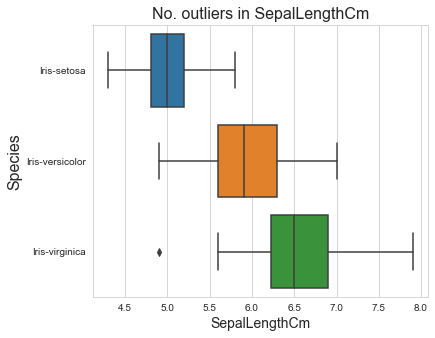

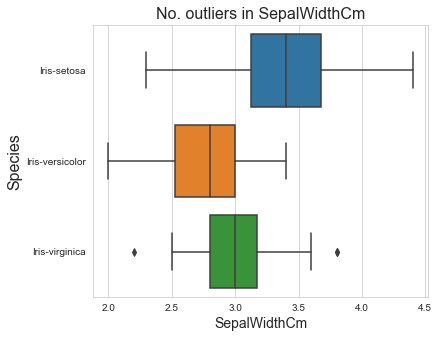

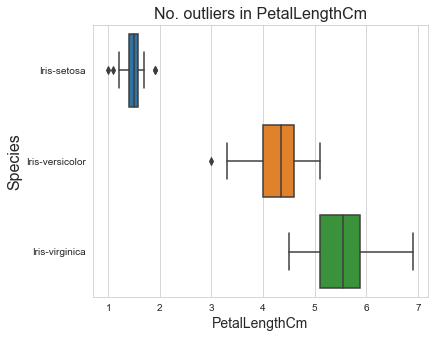

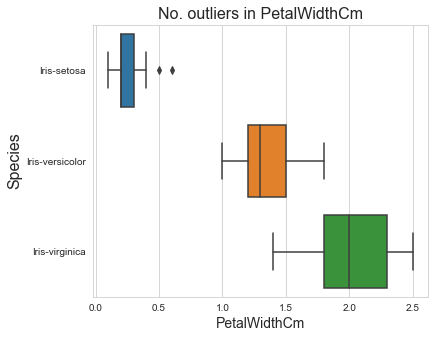

In [15]:
#To view the Outliers we use Boxplots:
for i in iris_data.iloc[:,[0,1,2,3]]:
    plt.figure(figsize= (6,5))
    sns.boxplot(x=i,y ='Species' ,data = iris_data)
    plt.xlabel(i,fontsize=14)
    plt.ylabel('Species',fontsize = 16)
    plt.title('No. outliers in ' + i,size = 16)
    plt.show()

### Correlation :

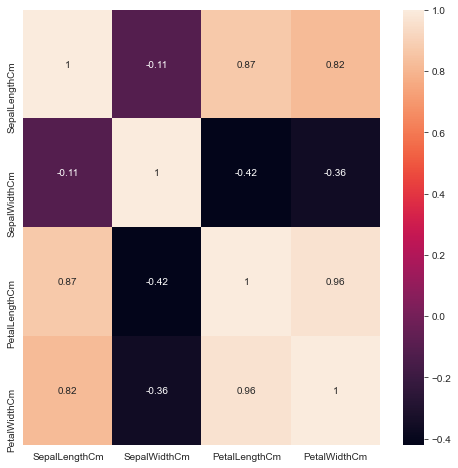

In [10]:
# Correlation matrix
plt.figure(figsize=(8,8))
corr_matrix=iris_data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

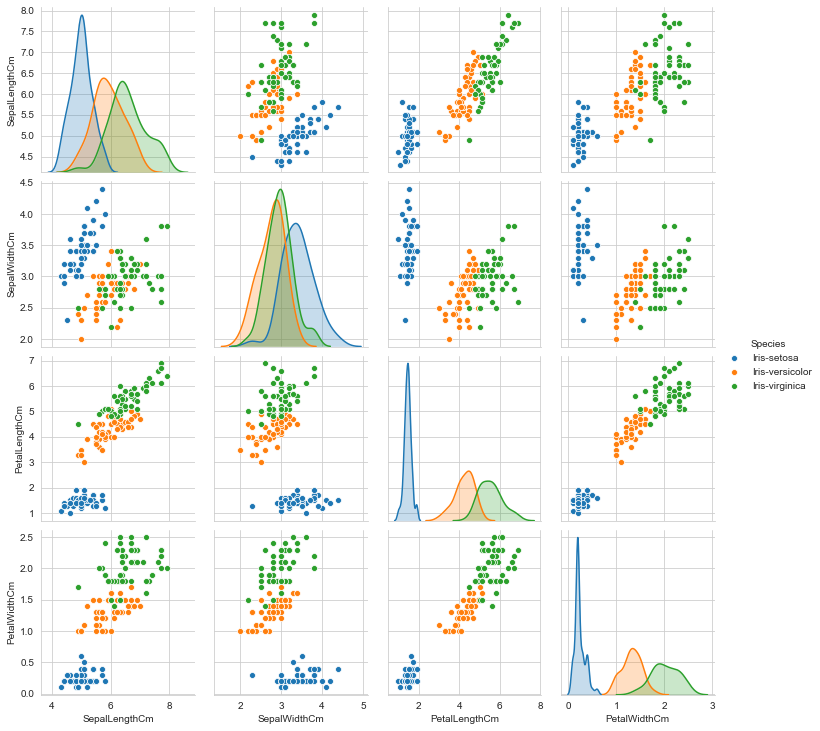

In [28]:
#pair plot:
sns.pairplot(iris_data,hue="Species")
plt.show()

● It's clear that the relationship between pairs of features of a iris-setosa is distinctly different from those of the other two species.

### Finding the optimum number of cluster for K-means Classificatioon:

In [16]:
X=iris_data.iloc[:,[0,1,2,3]].values
X[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Now we will implement The elbow method on the Iris dataset. this method allows us to pick the optimum amount of clusters.

In [17]:
from sklearn.cluster import KMeans
# within-cluster sum of squares (WCSS)
wcss=[] 
for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

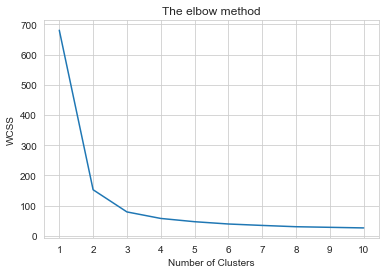

In [31]:
# plotting WCSS vs No. Clusters :
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("The elbow method")
plt.show()

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
We can use keenLocator to identify the elbow point.

In [18]:
#identify the elbow point:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print("the optimum number of clusters for the iris_dataset is :",kl.elbow)

the optimum number of clusters for the iris_dataset is : 3


In [19]:
#Creating the kmeans classifier:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [20]:
#centroids of the clusters :
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

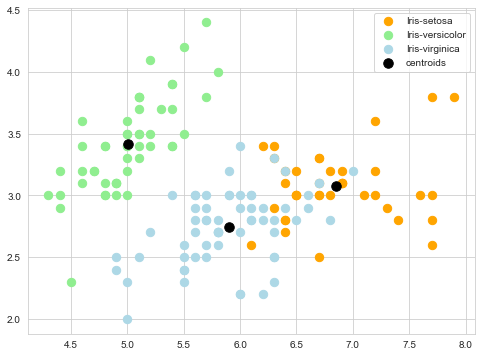

In [27]:
#Visualising the clusters:
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans==0,0] , X[y_kmeans==0,1] ,s=70 ,c='orange' , label ='Iris-setosa')
plt.scatter(X[y_kmeans==1,0] , X[y_kmeans==1,1] ,s=70 ,c='lightgreen' , label ='Iris-versicolor')
plt.scatter(X[y_kmeans==2,0] , X[y_kmeans==2,1] ,s=70 ,c='lightblue' , label ='Iris-virginica')

# Plotting the centroids of the clusters:
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=90 , c='black' , label ='centroids')
plt.legend()
plt.show()

## Thank You